In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline
import urllib2
import numpy as np

np.set_printoptions(precision=3, suppress=True)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:]

def check_condition(row):
    if row[3] == 0:
        return False
    return True

a = np.apply_along_axis(check_condition, 1, csv)
a = np.where(a == True)[0]
nonZeroMask = csv[a, :]

synDividedMask = np.divide(nonZeroMask[:,4],nonZeroMask[:,3])
synDividedMask = synDividedMask * (64**3)
accurateDataT = np.vstack((nonZeroMask[:,0],nonZeroMask[:,1],nonZeroMask[:,2],synDividedMask))
accurateData = accurateDataT.T

cleaned = accurateData[accurateData[:,0] >= 409]
cleaned = cleaned[cleaned[:,0] <= 3529]
cleaned = cleaned[cleaned[:,1] >= 1564]
cleaned = cleaned[cleaned[:,1] <= 3124]

Running GMM on layer 55.0
Running GMM on layer 166.0
Running GMM on layer 277.0
Running GMM on layer 388.0
Running GMM on layer 499.0
Running GMM on layer 610.0
Running GMM on layer 721.0
Running GMM on layer 832.0
Running GMM on layer 943.0
Running GMM on layer 1054.0
Running GMM on layer 1165.0


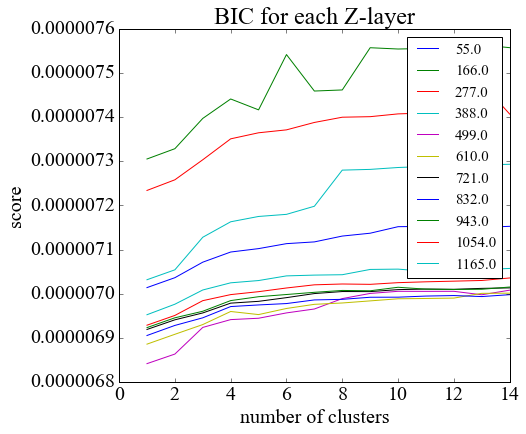

In [13]:
import sklearn.mixture as mixture
import matplotlib as mpl
mpl.rcParams['font.size'] = 20
mpl.rc('font',family='Times New Roman')

plt.figure(figsize=(7,7))
divisions = np.unique(cleaned[:,2])

for d in divisions:
	z_layer = cleaned[cleaned[:,2] == d]

	#Run GMM on layer
	print 'Running GMM on layer ' + str(d)
	max_clusters = 15
	bic = np.array([])
	i = np.array(range(1, max_clusters))
	for idx in range(1, max_clusters):
	    #print "Fitting and evaluating model with " + str(idx) + " clusters."
	    gmm = mixture.GMM(n_components=idx,n_iter=1000,covariance_type='diag', random_state=1)
	    gmm.fit(z_layer[:,(0,1,3)])
	    bic = np.append(bic, gmm.bic(z_layer[:,(0,1,3)]))
	#print bic
	plt.plot(i, 1.0/bic)
	plt.hold(True)
plt.title('BIC for each Z-layer')
plt.ylabel('score')
plt.xlabel('number of clusters')
plt.legend(divisions,fontsize=15)
plt.subplots_adjust(bottom=.2)
plt.savefig('Fig12.pdf', format='pdf', dpi=1000)
plt.show()